In [0]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
import json
from google.colab import drive

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
path='/gdrive/My Drive/datasets/'

In [0]:
import json
with open(path+'69337.json') as data_file:    
    data = json.load(data_file)

In [0]:
from pandas.io.json import json_normalize
df = json_normalize(data, sep = "_")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


In [0]:
path

'/gdrive/dataset/'

In [0]:
df.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'type_id', 'type_name',
       ...
       'pass_miscommunication', 'ball_recovery_offensive', 'shot_open_goal',
       'foul_won_penalty', 'shot_aerial_won', 'block_save_block',
       'pass_cut_back', 'dribble_nutmeg', 'bad_behaviour_card_id',
       'bad_behaviour_card_name'],
      dtype='object', length=110)

In [0]:
df.head(20)

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_body_part_id,pass_body_part_name,pass_type_id,pass_type_name,off_camera,under_pressure,carry_end_location,pass_switch,pass_assisted_shot_id,...,foul_committed_card_id,foul_committed_card_name,foul_committed_type_id,foul_committed_type_name,foul_committed_offensive,out,pass_through_ball,pass_technique_id,pass_technique_name,dribble_nutmeg,pass_deflected,clearance_head,clearance_right_foot,shot_aerial_won,goalkeeper_body_part_id,goalkeeper_body_part_name,goalkeeper_technique_id,goalkeeper_technique_name,pass_outswinging,foul_committed_advantage,foul_won_advantage,pass_no_touch,dribble_overrun,miscontrol_aerial_won,pass_inswinging,foul_won_defensive,pass_goal_assist,shot_open_goal,pass_cut_back,clearance_aerial_won,shot_one_on_one,block_save_block,bad_behaviour_card_id,bad_behaviour_card_name,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,dribble_no_touch,clearance_other
0,efa70caf-6cc6-4cdf-97db-1a30434a43db,1,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,212,Atlético Madrid,1,Regular Play,212,Atlético Madrid,442.0,"[{'player': {'id': 3509, 'name': 'Thibaut Cour...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,c99d4f93-3d1e-4a44-8c43-afac4034d553,2,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,212,Atlético Madrid,1,Regular Play,217,Barcelona,433.0,"[{'player': {'id': 20176, 'name': 'Víctor Vald...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4963d26a-6f03-497f-b467-7f522803b244,3,1,00:00:00.000,0,0,1,0.000000,18,Half Start,212,Atlético Madrid,1,Regular Play,217,Barcelona,NaN,NaN,[96c99371-83ac-4d30-81ec-58805e787055],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,96c99371-83ac-4d30-81ec-58805e787055,4,1,00:00:00.000,0,0,1,0.000000,18,Half Start,212,Atlético Madrid,1,Regular Play,212,Atlético Madrid,NaN,NaN,[4963d26a-6f03-497f-b467-7f522803b244],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ae47e83e-cc18-4908-a030-af732267542a,5,1,00:00:00.180,0,0,2,0.499312,30,Pass,217,Barcelona,9,From Kick Off,217,Barcelona,NaN,NaN,[ac4c46bc-f058-4a3b-8968-cb8f03bd7f84],"[61.0, 41.0]",3478.0,Francesc Fàbregas i Soler,21.0,Left Wing,5503.0,Lionel Andrés Messi Cuccittini,3.400000,1.570796,1.0,Ground Pass,"[61.0, 44.4]",40.0,Right Foot,65.0,Kick Off,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ac4c46bc-f058-4a3b-8968-cb8f03bd7f84,6,1,00:00:00.679,0,0,2,NaN,42,Ball Receipt*,217,Barcelona,9,From Kick Off,217,Barcelona,NaN,NaN,[ae47e83e-cc18-4908-a030-af732267542a],"[61.0, 44.4]",5503.0,Lionel Andrés Messi Cuccittini,23.0,Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [0]:
df[df.type_name=="Pass"].groupby("team_name")["id"].count()

team_name
Atlético Madrid    295
Barcelona          760
Name: id, dtype: int64

In [0]:
df[df.type_name=="Shot"].groupby("team_name")["id"].count()

team_name
Atlético Madrid    13
Barcelona           8
Name: id, dtype: int64

In [0]:
utah_pass=df[(df.possession_team_name=="Barcelona") & (df.type_name=="Pass")]

In [0]:
utah_pass.groupby("pass_type_name").size()

pass_type_name
Corner           2
Free Kick       24
Goal Kick        8
Interception    12
Kick Off         2
Recovery        36
Throw-in        18
dtype: int64

In [0]:
utah_pass.head()

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_body_part_id,pass_body_part_name,pass_type_id,pass_type_name,off_camera,under_pressure,carry_end_location,pass_switch,pass_assisted_shot_id,...,foul_committed_card_id,foul_committed_card_name,foul_committed_type_id,foul_committed_type_name,foul_committed_offensive,out,pass_through_ball,pass_technique_id,pass_technique_name,dribble_nutmeg,pass_deflected,clearance_head,clearance_right_foot,shot_aerial_won,goalkeeper_body_part_id,goalkeeper_body_part_name,goalkeeper_technique_id,goalkeeper_technique_name,pass_outswinging,foul_committed_advantage,foul_won_advantage,pass_no_touch,dribble_overrun,miscontrol_aerial_won,pass_inswinging,foul_won_defensive,pass_goal_assist,shot_open_goal,pass_cut_back,clearance_aerial_won,shot_one_on_one,block_save_block,bad_behaviour_card_id,bad_behaviour_card_name,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,dribble_no_touch,clearance_other
85,9b973396-4cf8-44c1-bac8-0cd6f8d065f7,86,1,00:01:25.299,1,25,3,1.935696,16,Shot,217,Barcelona,3,From Free Kick,217,Barcelona,NaN,NaN,"[a310f877-f634-4d48-8112-2c642cc36cf5, b4ce354...","[95.7, 49.0]",20131.0,Xavier Hernández Creus,15.0,Left Center Midfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
894,e5359292-5cf0-478e-8355-f93d7c0a0b3d,895,1,00:17:19.818,17,19,36,0.616080,16,Shot,217,Barcelona,4,From Throw In,217,Barcelona,NaN,NaN,"[62b8a494-3ee7-4e08-a8f0-1370b356a2e1, b84ebaf...","[109.1, 43.2]",3385.0,Alexis Alejandro Sánchez Sánchez,17.0,Right Wing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
983,b0086c23-f6ea-4153-bf67-3859ff30b5d4,984,1,00:19:38.109,19,38,37,0.994700,16,Shot,217,Barcelona,3,From Free Kick,217,Barcelona,NaN,NaN,[a477cb9c-ae96-4c2f-82bb-7e2c60a90fc1],"[92.5, 46.5]",20131.0,Xavier Hernández Creus,15.0,Left Center Midfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1783,923dde08-1522-465f-84b0-8a5b869582cc,1784,1,00:35:14.056,35,14,78,0.377118,16,Shot,217,Barcelona,1,Regular Play,217,Barcelona,NaN,NaN,[6be460b8-2866-45ac-a386-b3c621327e64],"[114.5, 43.7]",4324.0,Daniel Alves da Silva,2.0,Right Back,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,7367dfc8-665e-4987-b290-9d086178dd23,2008,1,00:40:09.293,40,9,84,1.240824,16,Shot,217,Barcelona,4,From Throw In,217,Barcelona,NaN,NaN,[d43d32ed-244b-4c00-9be1-b658eb6b5317],"[92.4, 62.6]",4324.0,Daniel Alves da Silva,2.0,Right Back,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
utah_pass.groupby("pass_height_name").size()

pass_height_name
Ground Pass    569
High Pass      134
Low Pass        73
dtype: int64

In [0]:
utah_pass.pass_length.mean()

20.681568308376256

In [0]:
utah_pass.groupby(["player_name","position_name","team_name"]).size().sort_values(ascending=False).reset_index(name='count')

,player_name,position_name,team_name,count
0,Xavier Hernández Creus,Left Center Midfield,Barcelona,115
1,Eric-Sylvain Bilal Abidal,Left Back,Barcelona,94
2,Daniel Alves da Silva,Right Back,Barcelona,85
3,Javier Alejandro Mascherano,Left Center Back,Barcelona,68
4,Sergio Busquets i Burgos,Center Defensive Midfield,Barcelona,63
5,Francesc Fàbregas i Soler,Left Wing,Barcelona,58
6,Andrés Iniesta Luján,Right Center Midfield,Barcelona,58
7,Carles Puyol i Saforcada,Right Center Back,Barcelona,55
8,Lionel Andrés Messi Cuccittini,Center Forward,Barcelona,54
9,Víctor Valdés Arribas,Goalkeeper,Barcelona,37


In [0]:
utah_pass.groupby(["player_name","pass_recipient_name"]).size().sort_values(ascending=False).reset_index(name='count')

,player_name,pass_recipient_name,count
0,Xavier Hernández Creus,Daniel Alves da Silva,27
1,Daniel Alves da Silva,Xavier Hernández Creus,27
2,Javier Alejandro Mascherano,Eric-Sylvain Bilal Abidal,23
3,Daniel Alves da Silva,Lionel Andrés Messi Cuccittini,21
4,Eric-Sylvain Bilal Abidal,Francesc Fàbregas i Soler,20
...,...,...,...
136,Filipe Luis Kasmirski,Diego Roberto Godín Leal,1
137,Filipe Luis Kasmirski,Adrián López Álvarez,1
138,Eric-Sylvain Bilal Abidal,Pedro Eliezer Rodríguez Ledesma,1
139,Diego Roberto Godín Leal,Jorge Resurrección Merodio,1


In [0]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
def draw_pitch(ax):
    # size of the pitch is 120, 80
    #Create figure

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,80], color="black")
    plt.plot([0,120],[80,80], color="black")
    plt.plot([120,120],[80,0], color="black")
    plt.plot([120,0],[0,0], color="black")
    plt.plot([60,60],[0,80], color="black")

    #Left Penalty Area
    plt.plot([14.6,14.6],[57.8,22.2],color="black")
    plt.plot([0,14.6],[57.8,57.8],color="black")
    plt.plot([0,14.6],[22.2,22.2],color="black")

    #Right Penalty Area
    plt.plot([120,105.4],[57.8,57.8],color="black")
    plt.plot([105.4,105.4],[57.8,22.5],color="black")
    plt.plot([120, 105.4],[22.5,22.5],color="black")

    #Left 6-yard Box
    plt.plot([0,4.9],[48,48],color="black")
    plt.plot([4.9,4.9],[48,32],color="black")
    plt.plot([0,4.9],[32,32],color="black")

    #Right 6-yard Box
    plt.plot([120,115.1],[48,48],color="black")
    plt.plot([115.1,115.1],[48,32],color="black")
    plt.plot([120,115.1],[32,32],color="black")

    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black",fill=False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")

    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    #Prepare Arcs
    # arguments for arc
    # x, y coordinate of centerpoint of arc
    # width, height as arc might not be circle, but oval
    # angle: degree of rotation of the shape, anti-clockwise
    # theta1, theta2, start and end location of arc in degree
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)


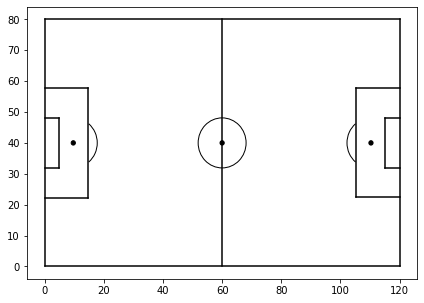

In [0]:
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax)
plt.show()

In [0]:
utah_pass = utah_pass[["id", "team_name","type_name","period", "timestamp", "location", "pass_end_location", "player_name"]]
utah_pass.head()

,id,team_name,type_name,period,timestamp,location,pass_end_location,player_name
4,ae47e83e-cc18-4908-a030-af732267542a,Barcelona,Pass,1,00:00:00.180,"[61.0, 41.0]","[61.0, 44.4]",Francesc Fàbregas i Soler
6,12f25f92-83fa-4331-ac37-c259818449e3,Barcelona,Pass,1,00:00:00.906,"[61.0, 41.0]","[46.2, 35.0]",Lionel Andrés Messi Cuccittini
8,ecbb360b-6e4c-4dc1-85f6-ed036b1f06ae,Barcelona,Pass,1,00:00:03.556,"[46.5, 34.8]","[41.7, 71.8]",Xavier Hernández Creus
12,ae3fb161-79e6-4640-a289-aa3089b8f90c,Barcelona,Pass,1,00:00:05.701,"[41.7, 71.8]","[31.8, 53.9]",Daniel Alves da Silva
15,cfeb7364-baad-4ee1-9f9a-f9e109f71f7f,Barcelona,Pass,1,00:00:09.334,"[26.4, 54.8]","[31.3, 27.9]",Carles Puyol i Saforcada


In [0]:
import pandas as pd
utah_pass[['location_x','location_y']] = pd.DataFrame(utah_pass.location.tolist(), index= utah_pass.index)
utah_pass[['end_location_x','end_location_y']] = pd.DataFrame(utah_pass.pass_end_location.tolist(), index= utah_pass.index)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [0]:
utah_pass=utah_pass.drop(['location','pass_end_location'], axis = 1) 

In [0]:
utah_pass.head()

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,under_pressure,carry_end_location,pass_outcome_id,pass_outcome_name,ball_receipt_outcome_id,...,shot_body_part_name,shot_freeze_frame,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_outcome_id,goalkeeper_outcome_name,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_type_id,goalkeeper_type_name,dribble_overrun,pass_through_ball,pass_technique_id,pass_technique_name,shot_one_on_one,goalkeeper_end_location,interception_outcome_id,interception_outcome_name,pass_miscommunication,foul_won_defensive,ball_recovery_offensive,pass_shot_assist,goalkeeper_body_part_id,goalkeeper_body_part_name,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,50_50_outcome_id,50_50_outcome_name,dribble_nutmeg,ball_recovery_recovery_failure,foul_committed_card_id,foul_committed_card_name,bad_behaviour_card_id,bad_behaviour_card_name,location_x,location_y,end_location_x,end_location_y
4,33c9fe48-96a7-4f29-88c5-108cb736c1a5,5,1,00:00:01.160,0,1,2,1.225,30,Pass,767,Utah Royals,9,From Kick Off,767,Utah Royals,NaN,NaN,[839090eb-8bea-49b9-a609-1a8992bafec4],"[60.0, 40.0]",5027.0,Erika Tymrak,17.0,Right Wing,4979.0,Katrina Gorry,6.403124,-2.466852,1.0,Ground Pass,"[55.0, 36.0]",65.0,Kick Off,40.0,Right Foot,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,40.0,55.0,36.0
8,326ad510-88db-466b-8ba2-7e3039834afb,9,1,00:00:03.748,0,3,2,1.799,30,Pass,767,Utah Royals,9,From Kick Off,767,Utah Royals,NaN,NaN,"[189506b6-966b-4de3-8a7c-91c57bf7a40a, a964d70...","[57.0, 37.0]",4979.0,Katrina Gorry,11.0,Left Defensive Midfield,6817.0,Christen Press,39.217342,-0.337878,2.0,Low Pass,"[94.0, 24.0]",NaN,NaN,40.0,Right Foot,NaN,NaN,9.0,Incomplete,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.0,37.0,94.0,24.0
10,189506b6-966b-4de3-8a7c-91c57bf7a40a,11,1,00:00:05.547,0,5,2,3.962,30,Pass,767,Utah Royals,9,From Kick Off,763,Sky Blue FC,NaN,NaN,"[326ad510-88db-466b-8ba2-7e3039834afb, d357235...","[27.0, 57.0]",4974.0,Mandy Freeman,3.0,Right Center Back,7180.0,Imani Dorsey,27.730848,-1.123276,2.0,Low Pass,"[39.0, 32.0]",66.0,Recovery,40.0,Right Foot,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,57.0,39.0,32.0
21,e2279c58-c733-460d-8c5e-2854d10d12d5,22,1,00:00:40.217,0,40,4,0.243,30,Pass,767,Utah Royals,1,Regular Play,767,Utah Royals,NaN,NaN,"[9a29e40d-2022-498d-b251-cdf82724812b, f36811b...","[32.0, 59.0]",4966.0,Desiree Scott,9.0,Right Defensive Midfield,4979.0,Katrina Gorry,10.440307,-0.291457,1.0,Ground Pass,"[42.0, 56.0]",66.0,Recovery,40.0,Right Foot,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,59.0,42.0,56.0
26,0e6d0ddd-eebe-4c52-a25f-c732a69bb016,27,1,00:00:42.109,0,42,4,1.570,30,Pass,767,Utah Royals,1,Regular Play,763,Sky Blue FC,NaN,NaN,"[93861339-e4fd-447c-912f-c637c4fb6713, fe97b03...","[84.0, 27.0]",4988.0,Sarah Killion,10.0,Center Defensive Midfield,7180.0,Imani Dorsey,8.062258,-1.446441,1.0,Ground Pass,"[85.0, 19.0]",66.0,Recovery,40.0,Right Foot,NaN,NaN,9.0,Incomplete,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [0]:
def heat_pass_team_map(data, team_name,period):
    pass_data = data[(data['type_name'] == "Pass") & (data['team_name'] == team_name)& (data.end_location_x>=data.location_x)]

    action_data = pass_data[(pass_data['team_name']==team_name)]
    
    fig=plt.figure()
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    draw_pitch(ax)
    plt.axis('off')

    for i in range(len(pass_data)):
        # we also differentiate different half by different color
        color = "blue" if pass_data.iloc[i]['period'] == 1 else "red"
        if pass_data.iloc[i]['period']==period:
          ax.annotate("", xy = (pass_data.iloc[i]['pass_end_location'][0], 80-pass_data.iloc[i]['pass_end_location'][1]), xycoords = 'data',
                xytext = (pass_data.iloc[i]['location'][0], 80-pass_data.iloc[i]['location'][1]), textcoords = 'data',
                arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = color),)
    x_coord = [i[0] for i in action_data["location"]]
    y_coord = [80-i[1] for i in action_data["location"]]
    sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30)
    plt.ylim(0, 80) # need this, otherwise kde plot will go outside
    plt.xlim(0, 120)
    plt.show()

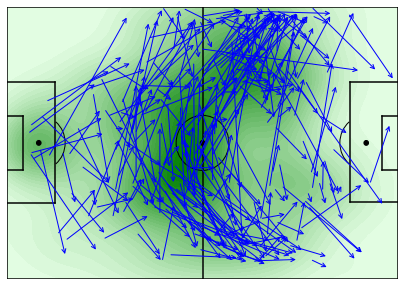

In [0]:
heat_pass_team_map(utah_pass, "Barcelona",1) #2 for 2nd half and 1 for 1st half

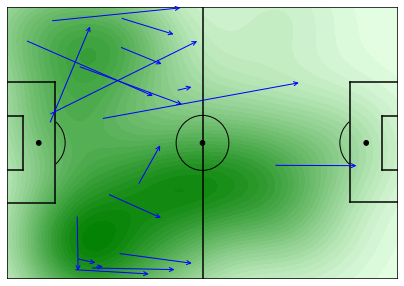

In [0]:
heat_pass_team_map(utah_pass, "Atlético Madrid",1)

## The above graph shows that Athletico have very conservative approach playing very less forward passes.

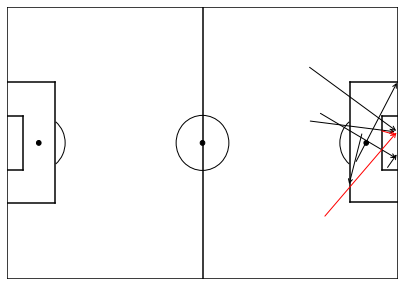

In [0]:
shot_data = df[(df['type_name'] == "Shot") & (df['team_name'] == 'Barcelona')]

fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax)
plt.axis('off')

for i in range(len(shot_data)):
    # can also differentiate different half by different color
    color = "red" if shot_data.iloc[i]['shot_outcome_name'] == "Goal" else "black"
    ax.annotate("", xy = (shot_data.iloc[i]['shot_end_location'][0], 80-shot_data.iloc[i]['shot_end_location'][1]), xycoords = 'data',
           xytext = (shot_data.iloc[i]['location'][0], 80-shot_data.iloc[i]['location'][1]), textcoords = 'data',
           arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = color),)
plt.ylim(0, 80)
plt.xlim(0, 120)
plt.show()

In [0]:
def draw_half_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = Rectangle([40,0], width = 60, height = 80, fill = False)
    #Right Penalty Area
    RightPenalty = Rectangle([85.4,22.3], width = 14.6, height = 35.3, fill = False)

    #Right 6-yard Box
    RightSixYard = Rectangle([95.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = Arc((40,40),width = 8.1, height = 8.1, angle=0,theta1=270,theta2=90,color="black")
    centreSpot = plt.Circle((40,40),0.71,color="black")
    rightPenSpot = plt.Circle((90.3,40),0.71,color="black")
    rightArc = Arc((90.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    element = [Pitch, RightPenalty, RightSixYard, centreCircle, centreSpot, rightPenSpot, rightArc]
    for i in element:
        ax.add_patch(i)

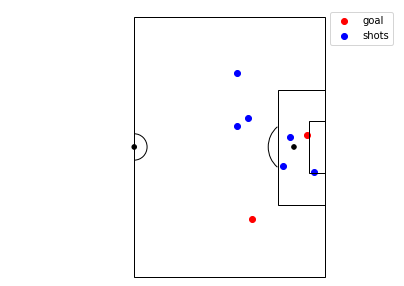

In [0]:
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_half_pitch(ax)
plt.axis('off')
# draw the scatter plot for goals
x_coord_goal = [location[0]-20 for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] == "Goal"]
y_coord_goal = [80-location[1] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] == "Goal"]
# shots that end up with no goal
x_coord = [location[0]-20 for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] != "Goal"]
y_coord = [80-location[1] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] != "Goal"]
# put the two scatter plots on to the pitch
ax.scatter(x_coord_goal, y_coord_goal, c = 'red', label = 'goal')
ax.scatter(x_coord, y_coord, c = 'blue', label = 'shots')
plt.ylim(-0.5, 83)
plt.xlim(0, 123)
plt.legend(loc='upper right')
plt.axis('off')
plt.show()

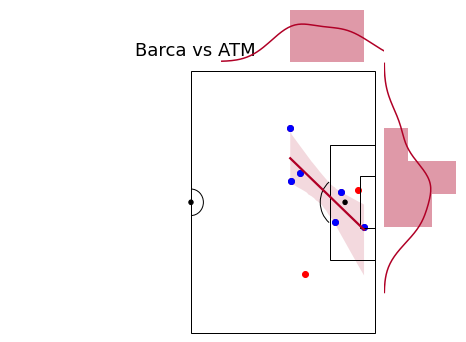

In [0]:
from matplotlib.offsetbox import  OffsetImage
cmap=plt.cm.YlOrRd_r # import cmap
joint_shot_chart = sns.jointplot(x_coord, y_coord, stat_func=None,
                                 kind='reg', space=0, color = cmap(0.1))
joint_shot_chart.fig.set_size_inches(7,5)
ax = joint_shot_chart.ax_joint
draw_half_pitch(ax)
ax.set_xlim(0.5,120.5)
ax.set_ylim(0.5,80.5)
# draw the scatter plot for goals
x_coord_goal = [location[0] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] == "Goal"]
y_coord_goal = [80-location[1] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] == "Goal"]
# shots that end up with no goal
x_coord = [location[0] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] != "Goal"]
y_coord = [80-location[1] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] != "Goal"]
# put the two scatter plots on to the pitch
ax.scatter(x_coord, y_coord, c = 'b', label = 'shots')
ax.scatter(x_coord_goal, y_coord_goal, c = 'r', label = 'goal')
# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Barca Shots vs ATM', 
             y=1.2, fontsize=18)
joint_shot_chart.ax_marg_x.set_axis_off()
joint_shot_chart.ax_marg_y.set_axis_off()
ax.set_axis_off()
plt.xlim(0,123)
plt.ylim(-.5, 83)
plt.axis('off')
plt.show()

In [0]:
def heat_pass_player_map(data, player_name):
    pass_data = data[(data['type_name'] == "Pass") & (data['player_name'] == player_name)]
    action_data = data[(data['player_name']==player_name)]
    
    fig=plt.figure()
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    draw_pitch(ax)
    plt.axis('off')

    """
    for i in range(len(pass_data)):
        # we also differentiate different half by different color
        color = "blue" if pass_data.iloc[i]['period'] == 1 else "red"
        ax.annotate("", xy = (pass_data.iloc[i]['pass_end_location'][0], pass_data.iloc[i]['pass_end_location'][1]), xycoords = 'data',
               xytext = (pass_data.iloc[i]['location'][0], pass_data.iloc[i]['location'][1]), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = color),)
    """
    x_coord = [i[0] for i in action_data["location"]]
    y_coord = [80-i[1] for i in action_data["location"]]
    sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30)
    plt.ylim(0, 80) # need this, otherwise kde plot will go outside
    plt.xlim(0, 120)
    plt.show()

## Lets look at the heat map of Lionel Messi

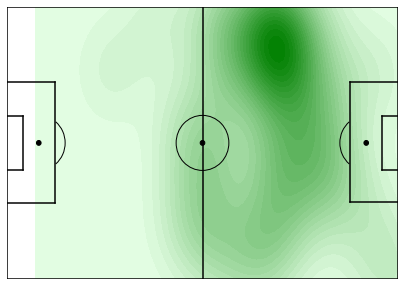

In [0]:
heat_pass_player_map(utah_pass, "Lionel Andrés Messi Cuccittini") 

In [0]:
for i in df.columns:
  print(i)

id
index
period
timestamp
minute
second
possession
duration
type_id
type_name
possession_team_id
possession_team_name
play_pattern_id
play_pattern_name
team_id
team_name
tactics_formation
tactics_lineup
related_events
location
player_id
player_name
position_id
position_name
pass_recipient_id
pass_recipient_name
pass_length
pass_angle
pass_height_id
pass_height_name
pass_end_location
pass_type_id
pass_type_name
pass_body_part_id
pass_body_part_name
under_pressure
carry_end_location
pass_outcome_id
pass_outcome_name
ball_receipt_outcome_id
ball_receipt_outcome_name
counterpress
dribble_outcome_id
dribble_outcome_name
duel_type_id
duel_type_name
duel_outcome_id
duel_outcome_name
pass_cross
pass_aerial_won
foul_committed_type_id
foul_committed_type_name
pass_switch
pass_backheel
pass_assisted_shot_id
pass_goal_assist
shot_statsbomb_xg
shot_end_location
shot_key_pass_id
shot_type_id
shot_type_name
shot_technique_id
shot_technique_name
shot_outcome_id
shot_outcome_name
shot_first_time
shot_b

In [0]:
df1=df[["team_name","type_name","shot_statsbomb_xg","shot_outcome_name"]].reset_index()
df1=df1[df1.type_name=="Shot"]
df1.head(20)

,index,team_name,type_name,shot_statsbomb_xg,shot_outcome_name
85,85,Barcelona,Shot,0.023004,Off T
894,894,Barcelona,Shot,0.036469,Wayward
983,983,Barcelona,Shot,0.057956,Saved
1288,1288,Atlético Madrid,Shot,0.025471,Saved
1496,1496,Atlético Madrid,Shot,0.052855,Off T
1783,1783,Barcelona,Shot,0.707235,Goal
2007,2007,Barcelona,Shot,0.013025,Off T
2415,2415,Atlético Madrid,Shot,0.302244,Goal
2531,2531,Atlético Madrid,Shot,0.150464,Wayward
2540,2540,Atlético Madrid,Shot,0.042556,Blocked


In [0]:
df[df.shot_outcome_name=="Goal"].groupby("team_name")["shot_outcome_name"].count()

team_name
Atlético Madrid    1
Barcelona          2
Name: shot_outcome_name, dtype: int64

In [0]:
df[df.shot_outcome_name=="Goal"].groupby("player_name")["shot_outcome_name"].count()

player_name
Daniel Alves da Silva             1
Lionel Andrés Messi Cuccittini    1
Radamel Falcao García Zárate      1
Name: shot_outcome_name, dtype: int64

In [0]:
df.groupby("team_name")["shot_statsbomb_xg"].sum()

team_name
Atlético Madrid    1.179569
Barcelona          1.139878
Name: shot_statsbomb_xg, dtype: float64

In [0]:
df[df.dribble_nutmeg==True].groupby("player_name")["id"].count()

player_name
Adrián López Álvarez              1
Daniel Alves da Silva             1
Lionel Andrés Messi Cuccittini    1
Name: id, dtype: int64

In [0]:
def xg_plot(df, team_name,pitch_colour='#ffffff', line_colour='#000000', marker_colour='default'):
     
    fig=plt.figure()
    fig.set_size_inches(10, 7)
    ax=fig.add_subplot(1,1,1)
    draw_half_pitch(ax)
    plt.axis('off')

    df=df[df.team_name==team_name]
    goal = df[(df.type_name=="Shot")&(df.shot_outcome_name=="Goal")]

    x = [location[0]-20 for i, location in enumerate(goal["location"])]
    y = [80-location[1] for i, location in enumerate(goal["location"])]

    no_goal = df[(df['team_name'] == team_name) &(df.type_name=="Shot")&(df.shot_outcome_name!="Goal")]
    x_loc = [location[0]-20 for i, location in enumerate(no_goal["location"])]
    y_loc = [80-location[1] for i, location in enumerate(no_goal["location"])]
    

      
    # Assign marker colours for each team  
    markers = {'Barcelona': '#7D2B3A', 'Atlético Madrid': '#004494'}
    if marker_colour == 'default':
        marker_colour = markers.get(team_name)
    else: pass

    xg_no = [500 * i for i in no_goal['shot_statsbomb_xg']] # Scale xG values for plotting
    xg_go = [500 * i for i in goal['shot_statsbomb_xg']]
    zo = 12 # This is to ensure everything is plotted above the pitch elements
     
    # Plot shots
    plt.scatter(x_loc, y_loc, s=xg_no, c=marker_colour, edgecolors='k', zorder=zo, alpha=0.75)
    plt.scatter(x, y, s=xg_go, c=marker_colour, edgecolors='k', zorder=zo, alpha=0.75,marker="s")
 
    # Add legend to explain that marker size = xG
    mSize = [0.05,0.10,0.2,0.4,0.6,1] 
    mSizeS = [500 * i for i in mSize]
    mx = [5.5,7.5,10,13,17,21.5]
    my = [74.5,74.5,74.5,74.5,74.5,74.5]
    plt.scatter(mx, my, s=mSizeS, facecolors=marker_colour, edgecolor='k', zorder=zo)
    #plt.plot([5,22], [71,71], color=line_colour, lw=2, zorder=zo)
    #plt.arrow(5, 71, 17, 0)
    ax.annotate("", xytext=(5, 71), xy=(24, 71),
          arrowprops=dict(arrowstyle="->"))
    i = 0
    for i in range(len(mx)):
        plt.text(mx[i], my[i], mSize[i], fontsize=mSize[i]*18, color=pitch_colour, zorder=zo, ha='center', va='center')
    plt.text(11, 69,'xG', color=line_colour, ha='center', va='center', zorder=zo, fontsize=16)
 
    # Add legend to show team/player info
    xg_sum = str(round(np.sum(df['shot_statsbomb_xg']), 1))
    #goal_sum = str(np.sum(df['goal']))
    legend_string = team_name + '\n' + xg_sum + ' xG'
    plt.text(10, 60, legend_string, color=line_colour, ha='center', va='center', zorder=zo, fontsize=16)
    
    return
 

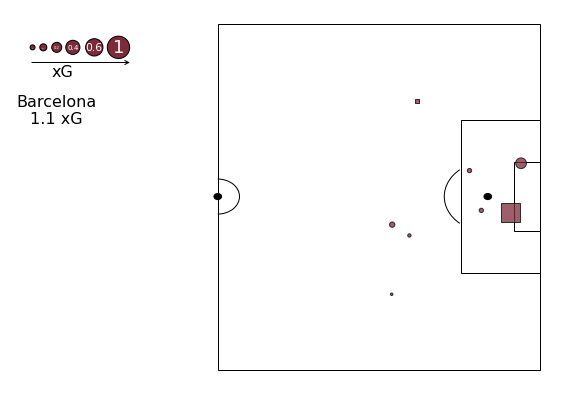

In [0]:
xg_plot(df, team_name='Barcelona')

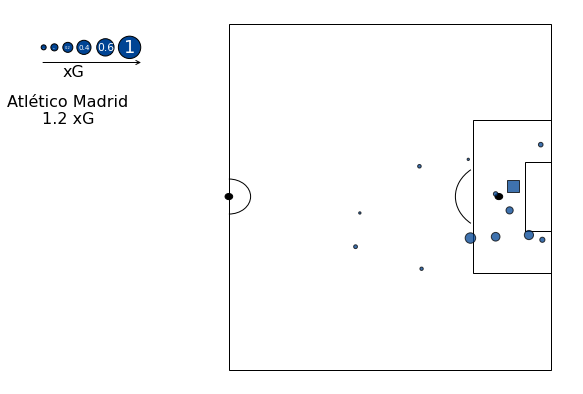

In [0]:
xg_plot(df, team_name='Atlético Madrid')

In [0]:
df

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_body_part_id,pass_body_part_name,pass_type_id,pass_type_name,off_camera,under_pressure,carry_end_location,pass_switch,pass_assisted_shot_id,...,foul_committed_card_id,foul_committed_card_name,foul_committed_type_id,foul_committed_type_name,foul_committed_offensive,out,pass_through_ball,pass_technique_id,pass_technique_name,dribble_nutmeg,pass_deflected,clearance_head,clearance_right_foot,shot_aerial_won,goalkeeper_body_part_id,goalkeeper_body_part_name,goalkeeper_technique_id,goalkeeper_technique_name,pass_outswinging,foul_committed_advantage,foul_won_advantage,pass_no_touch,dribble_overrun,miscontrol_aerial_won,pass_inswinging,foul_won_defensive,pass_goal_assist,shot_open_goal,pass_cut_back,clearance_aerial_won,shot_one_on_one,block_save_block,bad_behaviour_card_id,bad_behaviour_card_name,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,dribble_no_touch,clearance_other
0,efa70caf-6cc6-4cdf-97db-1a30434a43db,1,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,212,Atlético Madrid,1,Regular Play,212,Atlético Madrid,442.0,"[{'player': {'id': 3509, 'name': 'Thibaut Cour...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,c99d4f93-3d1e-4a44-8c43-afac4034d553,2,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,212,Atlético Madrid,1,Regular Play,217,Barcelona,433.0,"[{'player': {'id': 20176, 'name': 'Víctor Vald...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4963d26a-6f03-497f-b467-7f522803b244,3,1,00:00:00.000,0,0,1,0.000000,18,Half Start,212,Atlético Madrid,1,Regular Play,217,Barcelona,NaN,NaN,[96c99371-83ac-4d30-81ec-58805e787055],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,96c99371-83ac-4d30-81ec-58805e787055,4,1,00:00:00.000,0,0,1,0.000000,18,Half Start,212,Atlético Madrid,1,Regular Play,212,Atlético Madrid,NaN,NaN,[4963d26a-6f03-497f-b467-7f522803b244],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ae47e83e-cc18-4908-a030-af732267542a,5,1,00:00:00.180,0,0,2,0.499312,30,Pass,217,Barcelona,9,From Kick Off,217,Barcelona,NaN,NaN,[ac4c46bc-f058-4a3b-8968-cb8f03bd7f84],"[61.0, 41.0]",3478.0,Francesc Fàbregas i Soler,21.0,Left Wing,5503.0,Lionel Andrés Messi Cuccittini,3.400000,1.570796,1.0,Ground Pass,"[61.0, 44.4]",40.0,Right Foot,65.0,Kick Off,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3985,fa99501f-0065-4e5c-af76-d4ec652341a9,39

In [0]:
len(df[df.type_name=="Shot"].shot_freeze_frame.values[1])

9

In [0]:
shot_data=df[df.type_name=="Shot"]

In [0]:
shot_data.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'type_id', 'type_name',
       ...
       'shot_one_on_one', 'block_save_block', 'bad_behaviour_card_id',
       'bad_behaviour_card_name', 'substitution_outcome_id',
       'substitution_outcome_name', 'substitution_replacement_id',
       'substitution_replacement_name', 'dribble_no_touch', 'clearance_other'],
      dtype='object', length=120)

In [0]:
shot_data.head()

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_body_part_id,pass_body_part_name,pass_type_id,pass_type_name,off_camera,under_pressure,carry_end_location,pass_switch,pass_assisted_shot_id,...,foul_committed_card_id,foul_committed_card_name,foul_committed_type_id,foul_committed_type_name,foul_committed_offensive,out,pass_through_ball,pass_technique_id,pass_technique_name,dribble_nutmeg,pass_deflected,clearance_head,clearance_right_foot,shot_aerial_won,goalkeeper_body_part_id,goalkeeper_body_part_name,goalkeeper_technique_id,goalkeeper_technique_name,pass_outswinging,foul_committed_advantage,foul_won_advantage,pass_no_touch,dribble_overrun,miscontrol_aerial_won,pass_inswinging,foul_won_defensive,pass_goal_assist,shot_open_goal,pass_cut_back,clearance_aerial_won,shot_one_on_one,block_save_block,bad_behaviour_card_id,bad_behaviour_card_name,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,dribble_no_touch,clearance_other
85,9b973396-4cf8-44c1-bac8-0cd6f8d065f7,86,1,00:01:25.299,1,25,3,1.935696,16,Shot,217,Barcelona,3,From Free Kick,217,Barcelona,NaN,NaN,"[a310f877-f634-4d48-8112-2c642cc36cf5, b4ce354...","[95.7, 49.0]",20131.0,Xavier Hernández Creus,15.0,Left Center Midfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
894,e5359292-5cf0-478e-8355-f93d7c0a0b3d,895,1,00:17:19.818,17,19,36,0.616080,16,Shot,217,Barcelona,4,From Throw In,217,Barcelona,NaN,NaN,"[62b8a494-3ee7-4e08-a8f0-1370b356a2e1, b84ebaf...","[109.1, 43.2]",3385.0,Alexis Alejandro Sánchez Sánchez,17.0,Right Wing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
983,b0086c23-f6ea-4153-bf67-3859ff30b5d4,984,1,00:19:38.109,19,38,37,0.994700,16,Shot,217,Barcelona,3,From Free Kick,217,Barcelona,NaN,NaN,[a477cb9c-ae96-4c2f-82bb-7e2c60a90fc1],"[92.5, 46.5]",20131.0,Xavier Hernández Creus,15.0,Left Center Midfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1288,292d87c8-0bcf-42fb-b825-3d4615c34140,1289,1,00:25:36.119,25,36,50,1.240600,16,Shot,212,Atlético Madrid,1,Regular Play,212,Atlético Madrid,NaN,NaN,[069519f0-d81b-4baf-8180-f05f63d0563b],"[95.5, 33.0]",3445.0,Radamel Falcao García Zárate,24.0,Left Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1496,6677f2c8-c25f-48d1-ae27-8f9552463d48,1497,1,00:30:20.905,30,20,70,0.805765,16,Shot,212,Atlético Madrid,2,From Corner,212,Atlético Madrid,NaN,NaN,[6eddf6e8-3664-4130-b297-2015ab014032],"[118.4, 50.0]",5249.0,Diego Roberto Godín Leal,5.0,Left Center Back,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df.head()

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_body_part_id,pass_body_part_name,pass_type_id,pass_type_name,off_camera,under_pressure,carry_end_location,pass_switch,pass_assisted_shot_id,...,foul_committed_card_id,foul_committed_card_name,foul_committed_type_id,foul_committed_type_name,foul_committed_offensive,out,pass_through_ball,pass_technique_id,pass_technique_name,dribble_nutmeg,pass_deflected,clearance_head,clearance_right_foot,shot_aerial_won,goalkeeper_body_part_id,goalkeeper_body_part_name,goalkeeper_technique_id,goalkeeper_technique_name,pass_outswinging,foul_committed_advantage,foul_won_advantage,pass_no_touch,dribble_overrun,miscontrol_aerial_won,pass_inswinging,foul_won_defensive,pass_goal_assist,shot_open_goal,pass_cut_back,clearance_aerial_won,shot_one_on_one,block_save_block,bad_behaviour_card_id,bad_behaviour_card_name,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,dribble_no_touch,clearance_other
0,efa70caf-6cc6-4cdf-97db-1a30434a43db,1,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,212,Atlético Madrid,1,Regular Play,212,Atlético Madrid,442.0,"[{'player': {'id': 3509, 'name': 'Thibaut Cour...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,c99d4f93-3d1e-4a44-8c43-afac4034d553,2,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,212,Atlético Madrid,1,Regular Play,217,Barcelona,433.0,"[{'player': {'id': 20176, 'name': 'Víctor Vald...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4963d26a-6f03-497f-b467-7f522803b244,3,1,00:00:00.000,0,0,1,0.000000,18,Half Start,212,Atlético Madrid,1,Regular Play,217,Barcelona,NaN,NaN,[96c99371-83ac-4d30-81ec-58805e787055],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,96c99371-83ac-4d30-81ec-58805e787055,4,1,00:00:00.000,0,0,1,0.000000,18,Half Start,212,Atlético Madrid,1,Regular Play,212,Atlético Madrid,NaN,NaN,[4963d26a-6f03-497f-b467-7f522803b244],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ae47e83e-cc18-4908-a030-af732267542a,5,1,00:00:00.180,0,0,2,0.499312,30,Pass,217,Barcelona,9,From Kick Off,217,Barcelona,NaN,NaN,[ac4c46bc-f058-4a3b-8968-cb8f03bd7f84],"[61.0, 41.0]",3478.0,Francesc Fàbregas i Soler,21.0,Left Wing,5503.0,Lionel Andrés Messi Cuccittini,3.4,1.570796,1.0,Ground Pass,"[61.0, 44.4]",40.0,Right Foot,65.0,Kick Off,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
print(play_loc[play_loc["location"].isnull()]["type_name"])

In [0]:
rem=["Starting XI","Half Start","Substitution","Half End","Tactical Shift","Bad Behaviour"]

In [0]:
play_loc=df[~df.type_name.isin(rem)][['type_name','location','team_name','player_name']]

In [0]:
play_loc.isnull().sum()

type_name      0
location       0
team_name      0
player_name    0
dtype: int64

In [0]:
play_loc.head()

,type_name,location
4,Pass,"[61.0, 41.0]"
5,Ball Receipt*,"[61.0, 44.4]"
6,Pass,"[61.0, 41.0]"
7,Ball Receipt*,"[46.2, 35.0]"
8,Pass,"[46.5, 34.8]"


In [0]:
df[(df.type_name=="Starting XI") | (df.type_name=="Tactical Shift")][["team_name","tactics_formation"]]

,team_name,tactics_formation
0,Atlético Madrid,442.0
1,Barcelona,433.0
3559,Atlético Madrid,4141.0
3735,Barcelona,442.0


In [0]:
play_loc[['location_x','location_y']] = pd.DataFrame(play_loc.location.tolist(), index= play_loc.index)
play_loc.drop(["location"],axis=1)
play_loc_avg=play_loc[play_loc.team_name=="Barcelona"].groupby("player_name")[["location_x","location_y"]].mean().reset_index()


In [0]:
play_loc_avg

,player_name,location_x,location_y
0,Alexis Alejandro Sánchez Sánchez,85.298425,55.463780
1,Andrés Iniesta Luján,74.185232,21.736709
2,Carles Puyol i Saforcada,48.677540,52.846524
3,Daniel Alves da Silva,70.480734,68.885015
4,Eric-Sylvain Bilal Abidal,56.063732,13.404930
5,Francesc Fàbregas i Soler,67.962551,29.140741
6,Gerard Piqué Bernabéu,26.214286,47.757143
7,Javier Alejandro Mascherano,44.688525,31.587705
8,Juan Isaac Cuenca López,74.873333,62.090000
9,Lionel Andrés Messi Cuccittini,78.719665,47.588285


In [0]:
def avg_position_plot(df,play_loc, team_name,pitch_colour='#ffffff', line_colour='#000000', marker_colour='default'):
  play_loc[['location_x','location_y']] = pd.DataFrame(play_loc.location.tolist(), index= play_loc.index)
  play_loc.drop(["location"],axis=1)
  play_loc_avg=play_loc[play_loc.team_name==team_name].groupby("player_name")[["location_x","location_y"]].mean().reset_index()

  line_up=df[(df.type_name=="Starting XI") & (df.team_name==team_name)]["tactics_lineup"].values
  line_up=line_up[0]
  player_list=[]
  for i in line_up:
    player_list.append(i["player"]["name"])

  play_loc_avg=play_loc_avg[play_loc_avg.player_name.isin(player_list)]
  fig=plt.figure()
  fig.set_size_inches(7, 5)
  ax=fig.add_subplot(1,1,1)
  draw_pitch(ax)
  plt.axis('off')

  markers = {'Barcelona': '#004494', 'Atlético Madrid': '#7D2B3A'}
  if marker_colour == 'default':
      marker_colour = markers.get(team_name)
  else: pass

  x_loc=play_loc_avg.location_x.values
  y_loc=[]
  for i in play_loc_avg.location_y.values:
    y_loc.append(80-i) ##Since they have taken the top y-axis of the pitch to be 0 we have to change the y-axis orientation so 80-i.

  plt.scatter(x_loc, y_loc, c=marker_colour, edgecolors='k', zorder=12, alpha=0.75)


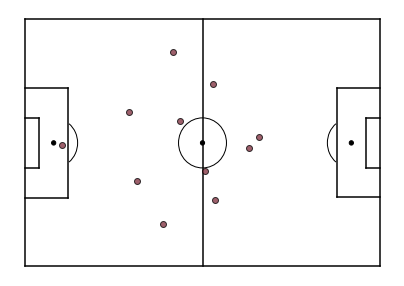

In [0]:
avg_position_plot(df,play_loc,"Atlético Madrid")

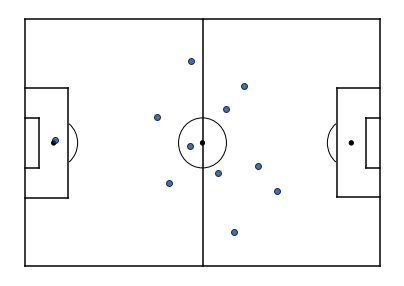

In [0]:
avg_position_plot(df,play_loc,"Barcelona")